<h1 align="center"> 
CERVICAL CANCER
</h1>

<h4 align="center"> 

</h4>

## 3. Data preprocessing

### 3.1. Load the Hepatitis Data

In [1]:
import warnings
warnings.filterwarnings("ignore")
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the data
df = pd.read_csv('risk_factors_cervical_cancer.csv')
#('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data',
                 #header=None,
                # names=['TARGET', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'])

# Show the header and the first five rows
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [2]:
df=df.rename(index=str, columns={"Biopsy": "Target"})
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Target
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### 3.2. Remove rows with missing values

In [10]:
import numpy as np

print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df = df.replace('?', np.NaN)

# Remove rows with np.NaN
df = df.dropna(how='any')

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 858
Number of rows after removing rows with missing values: 59


### 3.3. Get the feature and target vector

In [11]:
# Get the target vector
y = df.Target

In [12]:
# Specify the name of the features
features = list(df.drop('Target', axis=1).columns)

# Get the feature vector
X = df[features]

### 3.4. Encode the target

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

### 3.5. Divide the data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print([np.where(y_train == 0)[0].shape[0], np.where(y_train == 1)[0].shape[0]])

[35, 6]


In [24]:
from sklearn.ensemble import RandomForestClassifier
# Delcare the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
# Train the model
rf.fit(X_train,y_train)
# Print the classification accuracy
print('The accuracy of random forest is: ' + str(rf.score(X_test, y_test)))

The accuracy of random forest is: 0.8333333333333334


In [25]:

# Delcare the model
lr = LogisticRegression()
# Train the model
lr.fit(X_train,y_train)
# Print the classification accuracy
print('The accuracy of logistic Regresion is: ' + str(lr.score(X_test, y_test)))

The accuracy of logistic Regresion is: 0.8333333333333334


In [15]:
lr = LogisticRegression()

In [16]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
Biopsy_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [19]:
### CONFUSION MATRIX PLOT FUNCTION ###
def conf_plot(confmat):
    fig, ax = plt.subplots(figsize=(2.5,2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

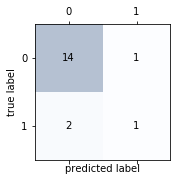

In [20]:
conf_mat = confusion_matrix(y_test, Biopsy_pred, labels=[0, 1])
conf_plot(conf_mat)